**# Artificial Neural Network**

**# Part 1 - Get the Dataset **

In [1]:
""" Importing the libraries """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
""" Importing the dataset from Co-Lab """
from google.colab import files
uploaded =files.upload

Saving RainfallDataset.csv to RainfallDataset.csv


In [3]:
dataset = pd.read_csv('RainfallDataset.csv')

In [6]:
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, 8].values

In [9]:
print(X[:5])

[[ 73.975     15.82929   75.4319    99.8291    29.9876    23.1296
  233.6253  ]
 [ 50.11935    2.735324 172.6221   138.3366    31.035     24.2791
  234.265   ]
 [ 35.66333   20.91133   80.7324   118.4768    32.4573    24.6901
  234.5127  ]
 [ 30.12903   32.05839  113.6901   126.977     31.7049    24.8354
  230.8205  ]
 [  1.5       36.012     44.9202   110.2216    32.7028    23.7491
  224.2406  ]]


In [10]:
print(y[:5])

[0 0 0 0 2]


In [11]:
pip install keras

In [12]:
pip install tensorflow

In [13]:
""" Convert the target variable into categorical data """
from keras.utils import to_categorical
y = to_categorical(y)

In [15]:
print(y[:5])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [29]:
""" Splitting the dataset into the Training set and Test set """
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
print(X_train[:5])

[[ 72.48667   29.50275  127.5094   129.7568    31.0573    23.5873
  259.41    ]
 [  8.376667  39.60354   37.4742    94.1817    33.4028    23.8491
  229.7173  ]
 [132.4333    47.95435  170.9765   137.8523    31.3082    23.7873
  258.1767  ]
 [ 23.04516   39.90706   69.3216   109.9758    32.8014    23.8981
  245.881   ]
 [ 54.6        7.70924  133.1432   140.1347    32.593     23.7455
  239.9468  ]]


In [32]:
print(y_train[:5])

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


**# Part 2 - Now let's make the ANN!**

In [33]:
""" Importing the Keras libraries and packages """
import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
""" Initialising the ANN """
classifier = Sequential()

""" Adding the input layer and the first hidden layer. first hidden layer units = 6 = (7 + 4)/2 """
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))

""" Adding the second hidden layer """
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

""" Adding the third hidden layer """
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

""" Adding the fourth hidden layer """
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

""" Adding the output layer This 4 is number of classes for target variable """
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))

""" Compiling the ANN """
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

""" Fitting the ANN to the Training set """
history = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 50)


Epoch 1/50
18/18 [==============================] - 1s 17ms/step - loss: 1.3831 - accuracy: 0.4438 - val_loss: 1.3823 - val_accuracy: 0.4000
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 1.3760 - accuracy: 0.4663 - val_loss: 1.3763 - val_accuracy: 0.4000
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 1.3646 - accuracy: 0.4663 - val_loss: 1.3603 - val_accuracy: 0.4000
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 1.3346 - accuracy: 0.5393 - val_loss: 1.2902 - val_accuracy: 0.6000
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 1.2505 - accuracy: 0.5843 - val_loss: 1.1448 - val_accuracy: 0.6444
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 1.0801 - accuracy: 0.6124 - val_loss: 0.9395 - val_accuracy: 0.6667
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.8861 - accuracy: 0.6461 - val_loss: 0.7549 - val_accuracy: 0.7111
Epoch 8/50
18/18 [=

**# Part 3 - Making the predictions and evaluating the model**

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 10ms/step


In [40]:
print(y_pred[:5])

[[ True False False False]
 [ True False False False]
 [False False  True False]
 [False False  True False]
 [False False  True False]]


In [41]:
# Convert boolean values into zero - one format
y_pred = y_pred.astype(int)

In [42]:
print(y_pred[:5])

[[1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [44]:
cm

array([[18,  0,  0,  1],
       [ 0,  2,  0,  0],
       [ 0,  0, 23,  0],
       [ 1,  0,  0, 11]])

In [45]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9642857142857143


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


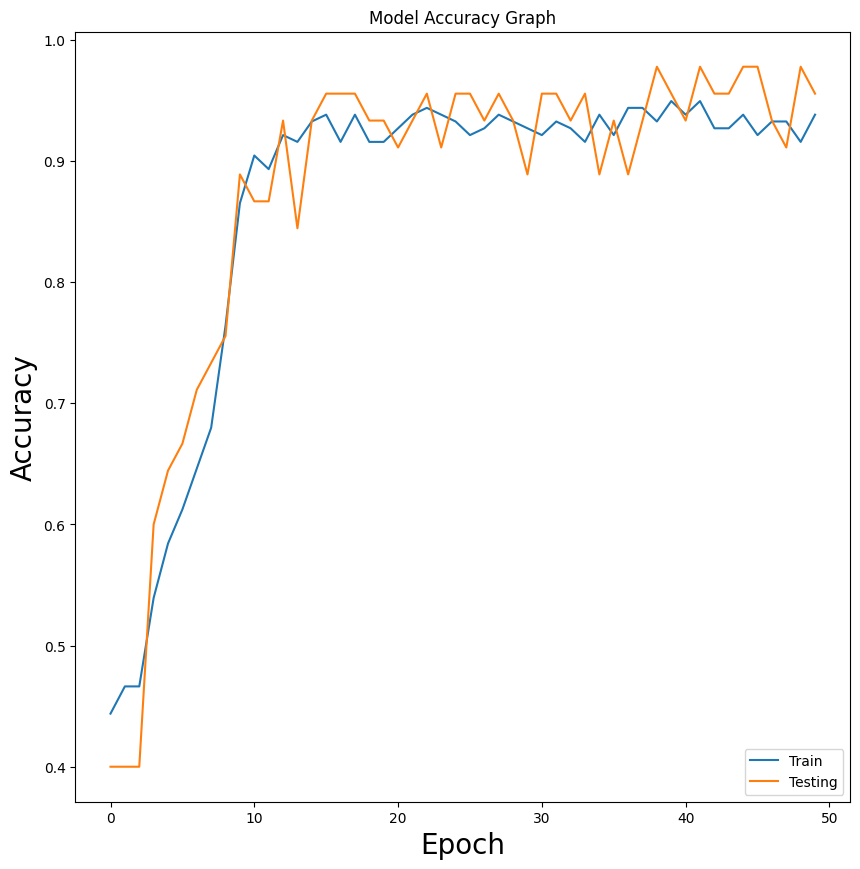

In [46]:
# Printing a graph showing the accuracy changes during the training phase (summarize history for accuracy)
print(history.history.keys())
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Graph')
plt.xlabel('Epoch').set_fontsize('20')
plt.ylabel('Accuracy').set_fontsize('20')
plt.legend(['Train', 'Testing'], loc='lower right')
plt.savefig('Accuracy.png', bbox_inches='tight', pad_inches = 0.1)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


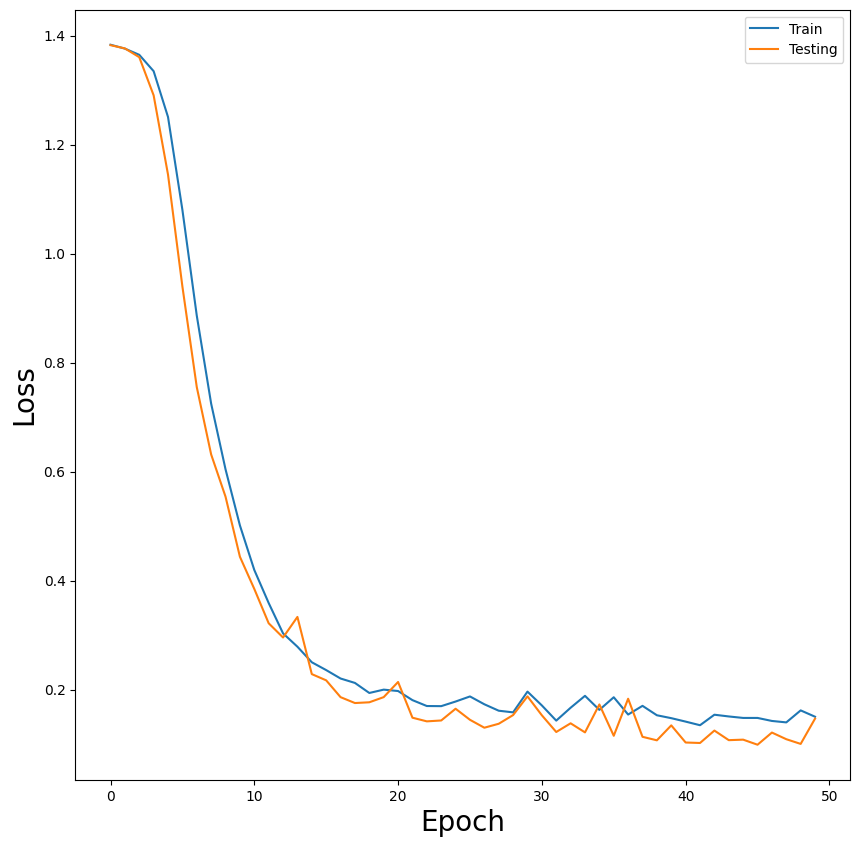

In [47]:
# summarize history for loss
print(history.history.keys())
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
"""plt.title('Model Loss Graph')"""
plt.xlabel('Epoch').set_fontsize('20')
plt.ylabel('Loss').set_fontsize('20')
plt.legend(['Train', 'Testing'], loc='upper right')
plt.savefig('Loss.png', bbox_inches='tight', pad_inches = 0.1)

In [48]:
# Save the Model
model_path = './model/ann_model.h5'
classifier.save(model_path)
print(f"Model saved to {model_path}")

Model saved to ./model/ann_model.h5


In [50]:
pwd

'/content'

In [51]:
# Load the Saved Model
from keras.models import load_model

model_path = './model/ann_model.h5'
loaded_classifier = load_model(model_path)
print("Model loaded successfully")

Model loaded successfully


In [54]:
# Use the loaded model for predict new instance data
new_instance = np.array([[17.975, 15.82929, 75.4319, 99.8291, 29.9876, 23.1296, 203.6253]])

# Make the prediction
prediction = loaded_classifier.predict(new_instance)

# If the output layer uses softmax, the result will be probabilities for each class
print("Prediction probabilities:", prediction)

# To get the class with the highest probability
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 24ms/step
Prediction probabilities: [[4.3187904e-01 2.1937296e-11 5.6808370e-01 3.7216167e-05]]
Predicted class: [2]
